# Importing packages, setting working directory, and loading file

In [ ]:
!pip install matplotlib

try:
  import tmtoolkit
except:
  !pip install tmtoolkit
  import tmtoolkit

try:
  from tmtoolkit.topicmod.tm_lda import compute_models_parallel
except:
  !pip install tmtoolkit['lda']
  from tmtoolkit.topicmod.tm_lda import compute_models_parallel

try:
  from lda import LDA
except:
  !pip install lda
  from lda import LDA

import pickle
import logging
import warnings

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

import random
random.seed(20191120)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
working_directory = '/content/drive/MyDrive/APRD6343/TopicModeling'

doc_labels = pickle.load(open('%s/final_labels.p' % working_directory, 'rb'))
dtm_sm = pickle.load(open('%s/final_dtm.p' % working_directory, 'rb'))
dtm_bg = pickle.load(open('%s/big_dtm.p' % working_directory, 'rb'))
vocab_bg = pickle.load(open('%s/big_vocab.p' % working_directory, 'rb'))
vocab_sm = pickle.load(open('%s/small_vocab.p' % working_directory, 'rb'))

In [ ]:
#For just Steve Madden Reviews with 2 or less stars
working_directory2 = '/content/drive/MyDrive/APRD6343/TopicModeling'

doc2_labels = pickle.load(open('%s/2final_labels.p' % working_directory2, 'rb'))
dtm2_sm = pickle.load(open('%s/2final_dtm.p' % working_directory2, 'rb'))
dtm2_bg = pickle.load(open('%s/2big_dtm.p' % working_directory2, 'rb'))
vocab2_bg = pickle.load(open('%s/2big_vocab.p' % working_directory2, 'rb'))
vocab2_sm = pickle.load(open('%s/2small_vocab.p' % working_directory2, 'rb'))

In [ ]:
#For just Steve Madden Reviews with 4 or more stars
working_directory3 = '/content/drive/MyDrive/APRD6343/TopicModeling'

doc3_labels = pickle.load(open('%s/3final_labels.p' % working_directory3, 'rb'))
dtm3_sm = pickle.load(open('%s/3final_dtm.p' % working_directory3, 'rb'))
dtm3_bg = pickle.load(open('%s/3big_dtm.p' % working_directory3, 'rb'))
vocab3_bg = pickle.load(open('%s/3big_vocab.p' % working_directory3, 'rb'))
vocab3_sm = pickle.load(open('%s/3small_vocab.p' % working_directory3, 'rb'))

In [ ]:
#suppress the "INFO" messages and warnings from lda
logger = logging.getLogger('lda')
logger.addHandler(logging.NullHandler())
logger.propagate = False
warnings.filterwarnings('ignore')

# Evaluation 1: all reviews

In [ ]:
#Should have an elbow in either Arun or Cao Juan plots, where it goes down with low point then up again
#The dip in the elbow is the number used as 'k' in the model creation notebook code
#Coherence plot should dip down, then go high and peak (like a square root sign)
#Tweak beta or alpha in the line below until graphs resemble elbows or square root signs

In [ ]:
const_params = {'n_iter':500, 'eta':0.1, 'random_state':20191122}
ks = list(range(1, 50, 5))
print(ks)
varying_params = [dict(n_topics=k, alpha=1/k) for k in ks]
print(varying_params)

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46]
[{'n_topics': 1, 'alpha': 1.0}, {'n_topics': 6, 'alpha': 0.16666666666666666}, {'n_topics': 11, 'alpha': 0.09090909090909091}, {'n_topics': 16, 'alpha': 0.0625}, {'n_topics': 21, 'alpha': 0.047619047619047616}, {'n_topics': 26, 'alpha': 0.038461538461538464}, {'n_topics': 31, 'alpha': 0.03225806451612903}, {'n_topics': 36, 'alpha': 0.027777777777777776}, {'n_topics': 41, 'alpha': 0.024390243902439025}, {'n_topics': 46, 'alpha': 0.021739130434782608}]


In [ ]:
from tmtoolkit.topicmod import tm_lda
eval_results = tm_lda.evaluate_topic_models(dtm_sm, varying_params, const_params)

In [ ]:
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results

results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
print(results_by_n_topics)

[(1, {'cao_juan_2009': nan, 'arun_2010': 676.2281531040242, 'coherence_mimno_2011': -1.667106821647571}), (6, {'cao_juan_2009': 0.4662032290581818, 'arun_2010': 487.00281816676693, 'coherence_mimno_2011': -1.9320707963013524}), (11, {'cao_juan_2009': 0.39779912729577427, 'arun_2010': 421.1284932292418, 'coherence_mimno_2011': -2.004025060844277}), (16, {'cao_juan_2009': 0.3816810630091833, 'arun_2010': 387.2934561012159, 'coherence_mimno_2011': -2.0131978275598694}), (21, {'cao_juan_2009': 0.3636110316831282, 'arun_2010': 356.3294440964921, 'coherence_mimno_2011': -2.068760642294041}), (26, {'cao_juan_2009': 0.35082183381881926, 'arun_2010': 339.33495730451335, 'coherence_mimno_2011': -2.09409024964871}), (31, {'cao_juan_2009': 0.3326479585524916, 'arun_2010': 321.8999501028369, 'coherence_mimno_2011': -2.071603546767033}), (36, {'cao_juan_2009': 0.3320790315211682, 'arun_2010': 307.7604408825319, 'coherence_mimno_2011': -2.0893413232297937}), (41, {'cao_juan_2009': 0.3194370269274607,

(<Figure size 576x432 with 3 Axes>,
 array([<AxesSubplot:title={'center':'arun_2010'}>,
        <AxesSubplot:title={'center':'cao_juan_2009'}>,
        <AxesSubplot:title={'center':'coherence_mimno_2011'}>],
       dtype=object))

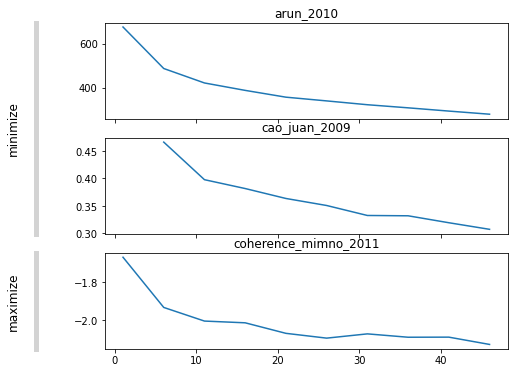

In [ ]:
plot_eval_results(results_by_n_topics)


# Evaluation 22: all reviews, with a lower beta

In [ ]:
const_params = {'n_iter':500, 'eta':0.01, 'random_state':20191122}
ks = list(range(1, 50, 5))
print(ks)
varying_params = [dict(n_topics=k, alpha=1/k) for k in ks]
print(varying_params)

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46]
[{'n_topics': 1, 'alpha': 1.0}, {'n_topics': 6, 'alpha': 0.16666666666666666}, {'n_topics': 11, 'alpha': 0.09090909090909091}, {'n_topics': 16, 'alpha': 0.0625}, {'n_topics': 21, 'alpha': 0.047619047619047616}, {'n_topics': 26, 'alpha': 0.038461538461538464}, {'n_topics': 31, 'alpha': 0.03225806451612903}, {'n_topics': 36, 'alpha': 0.027777777777777776}, {'n_topics': 41, 'alpha': 0.024390243902439025}, {'n_topics': 46, 'alpha': 0.021739130434782608}]


In [ ]:
from tmtoolkit.topicmod import tm_lda
eval_results = tm_lda.evaluate_topic_models(dtm_sm, varying_params, const_params)

In [ ]:
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results

results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
print(results_by_n_topics)

[(1, {'cao_juan_2009': nan, 'arun_2010': 676.2210464878766, 'coherence_mimno_2011': -1.667106821647571}), (6, {'cao_juan_2009': 0.4709190006017507, 'arun_2010': 484.9256549327688, 'coherence_mimno_2011': -1.9563584536254626}), (11, {'cao_juan_2009': 0.3981560353177038, 'arun_2010': 422.25555092871076, 'coherence_mimno_2011': -2.0467440948677895}), (16, {'cao_juan_2009': 0.36224516305705945, 'arun_2010': 385.29850332784645, 'coherence_mimno_2011': -2.034164537446732}), (21, {'cao_juan_2009': 0.34690113752988133, 'arun_2010': 350.96207828145697, 'coherence_mimno_2011': -2.0863542173748635}), (26, {'cao_juan_2009': 0.3292888675656355, 'arun_2010': 336.6771358369091, 'coherence_mimno_2011': -2.0732342171614997}), (31, {'cao_juan_2009': 0.32826380555749163, 'arun_2010': 323.5299670434094, 'coherence_mimno_2011': -2.1413657393150234}), (36, {'cao_juan_2009': 0.31057155718264484, 'arun_2010': 303.60212425604766, 'coherence_mimno_2011': -2.1575970847257113}), (41, {'cao_juan_2009': 0.303462772

(<Figure size 576x432 with 3 Axes>,
 array([<AxesSubplot:title={'center':'arun_2010'}>,
        <AxesSubplot:title={'center':'cao_juan_2009'}>,
        <AxesSubplot:title={'center':'coherence_mimno_2011'}>],
       dtype=object))

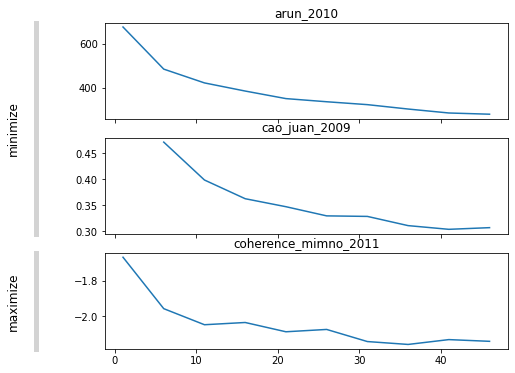

In [ ]:
plot_eval_results(results_by_n_topics) 

# Evaluation 3: all reviews, with a higher beta

In [ ]:
const_params = {'n_iter':500, 'eta':.8, 'random_state':20191122}
ks = list(range(1, 50, 5))
print(ks)
varying_params = [dict(n_topics=k, alpha=1/k) for k in ks]
print(varying_params)

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46]
[{'n_topics': 1, 'alpha': 1.0}, {'n_topics': 6, 'alpha': 0.16666666666666666}, {'n_topics': 11, 'alpha': 0.09090909090909091}, {'n_topics': 16, 'alpha': 0.0625}, {'n_topics': 21, 'alpha': 0.047619047619047616}, {'n_topics': 26, 'alpha': 0.038461538461538464}, {'n_topics': 31, 'alpha': 0.03225806451612903}, {'n_topics': 36, 'alpha': 0.027777777777777776}, {'n_topics': 41, 'alpha': 0.024390243902439025}, {'n_topics': 46, 'alpha': 0.021739130434782608}]


In [ ]:
from tmtoolkit.topicmod import tm_lda
eval_results = tm_lda.evaluate_topic_models(dtm_sm, varying_params, const_params)

In [ ]:
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results

results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
print(results_by_n_topics)

[(1, {'cao_juan_2009': nan, 'arun_2010': 676.2833844401351, 'coherence_mimno_2011': -1.667106821647571}), (6, {'cao_juan_2009': 0.4764778322300562, 'arun_2010': 488.5041333412136, 'coherence_mimno_2011': -1.9384833328994358}), (11, {'cao_juan_2009': 0.4238958539781709, 'arun_2010': 422.76831964919853, 'coherence_mimno_2011': -1.9804510926502141}), (16, {'cao_juan_2009': 0.4045514895060117, 'arun_2010': 390.40015817154256, 'coherence_mimno_2011': -2.009823342444908}), (21, {'cao_juan_2009': 0.38649979153175945, 'arun_2010': 370.50497053086156, 'coherence_mimno_2011': -2.0318479534694207}), (26, {'cao_juan_2009': 0.37166189861353155, 'arun_2010': 344.7417106394235, 'coherence_mimno_2011': -2.020006374840869}), (31, {'cao_juan_2009': 0.3607458337065563, 'arun_2010': 326.7268465614286, 'coherence_mimno_2011': -2.0666762951564226}), (36, {'cao_juan_2009': 0.36910053649767605, 'arun_2010': 317.3638242833085, 'coherence_mimno_2011': -2.0711055844866246}), (41, {'cao_juan_2009': 0.364496642569

(<Figure size 576x432 with 3 Axes>,
 array([<AxesSubplot:title={'center':'arun_2010'}>,
        <AxesSubplot:title={'center':'cao_juan_2009'}>,
        <AxesSubplot:title={'center':'coherence_mimno_2011'}>],
       dtype=object))

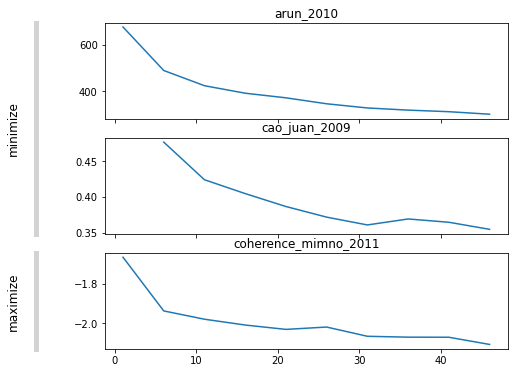

In [ ]:
plot_eval_results(results_by_n_topics) 

# Evaluation 4: all reviews, with a lower alpha

In [ ]:
const_params = {'n_iter':500, 'eta':0.1, 'random_state':20191122}
ks = list(range(1, 50, 5))
print(ks)
varying_params = [dict(n_topics=k, alpha=1/(50*k)) for k in ks] #default 10
print(varying_params)

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46]
[{'n_topics': 1, 'alpha': 0.02}, {'n_topics': 6, 'alpha': 0.0033333333333333335}, {'n_topics': 11, 'alpha': 0.0018181818181818182}, {'n_topics': 16, 'alpha': 0.00125}, {'n_topics': 21, 'alpha': 0.0009523809523809524}, {'n_topics': 26, 'alpha': 0.0007692307692307692}, {'n_topics': 31, 'alpha': 0.0006451612903225806}, {'n_topics': 36, 'alpha': 0.0005555555555555556}, {'n_topics': 41, 'alpha': 0.0004878048780487805}, {'n_topics': 46, 'alpha': 0.0004347826086956522}]


In [ ]:
from tmtoolkit.topicmod import tm_lda
eval_results = tm_lda.evaluate_topic_models(dtm_sm, varying_params, const_params)

In [ ]:
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results

results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
print(results_by_n_topics)

[(1, {'cao_juan_2009': nan, 'arun_2010': 676.2281531040242, 'coherence_mimno_2011': -1.667106821647571}), (6, {'cao_juan_2009': 0.8890407039142301, 'arun_2010': 584.9700897068843, 'coherence_mimno_2011': -1.714847427270298}), (11, {'cao_juan_2009': 0.8615041147357897, 'arun_2010': 547.5227351969077, 'coherence_mimno_2011': -1.7329991669167073}), (16, {'cao_juan_2009': 0.8548022230277277, 'arun_2010': 514.1584662653241, 'coherence_mimno_2011': -1.7686434079809432}), (21, {'cao_juan_2009': 0.8311628783266951, 'arun_2010': 489.8527160968455, 'coherence_mimno_2011': -1.7521379760776483}), (26, {'cao_juan_2009': 0.8336972716698406, 'arun_2010': 470.3934854200262, 'coherence_mimno_2011': -1.779894140788083}), (31, {'cao_juan_2009': 0.8287312309139498, 'arun_2010': 455.6064531353607, 'coherence_mimno_2011': -1.7967895446412296}), (36, {'cao_juan_2009': 0.8160808997759352, 'arun_2010': 437.07930844165804, 'coherence_mimno_2011': -1.7747007677687072}), (41, {'cao_juan_2009': 0.7987909706218536,

(<Figure size 576x432 with 3 Axes>,
 array([<AxesSubplot:title={'center':'arun_2010'}>,
        <AxesSubplot:title={'center':'cao_juan_2009'}>,
        <AxesSubplot:title={'center':'coherence_mimno_2011'}>],
       dtype=object))

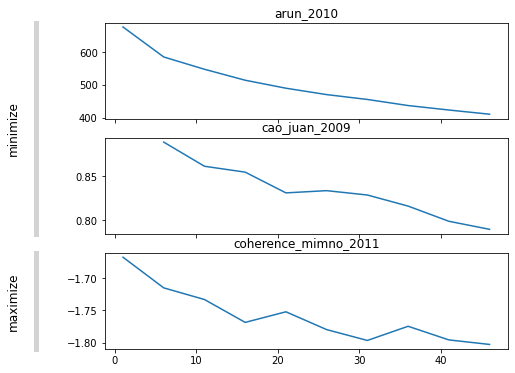

In [ ]:
plot_eval_results(results_by_n_topics) 

# Evaluation 5: all reviews, with a higher beta and a lower alpha

In [ ]:
const_params = {'n_iter':500, 'eta':1.3, 'random_state':20191122}
ks = list(range(1, 50, 5))
print(ks)
varying_params = [dict(n_topics=k, alpha=1/(5*k)) for k in ks] #default 10
print(varying_params)

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46]
[{'n_topics': 1, 'alpha': 0.2}, {'n_topics': 6, 'alpha': 0.03333333333333333}, {'n_topics': 11, 'alpha': 0.01818181818181818}, {'n_topics': 16, 'alpha': 0.0125}, {'n_topics': 21, 'alpha': 0.009523809523809525}, {'n_topics': 26, 'alpha': 0.007692307692307693}, {'n_topics': 31, 'alpha': 0.0064516129032258064}, {'n_topics': 36, 'alpha': 0.005555555555555556}, {'n_topics': 41, 'alpha': 0.004878048780487805}, {'n_topics': 46, 'alpha': 0.004347826086956522}]


In [ ]:
from tmtoolkit.topicmod import tm_lda
eval_results = tm_lda.evaluate_topic_models(dtm_sm, varying_params, const_params)

In [ ]:
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results

results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
print(results_by_n_topics)

[(1, {'cao_juan_2009': nan, 'arun_2010': 676.7003598070079, 'coherence_mimno_2011': -1.7693097612996247}), (6, {'cao_juan_2009': 0.5923988541990094, 'arun_2010': 511.2507319241047, 'coherence_mimno_2011': -1.9364706051559033}), (11, {'cao_juan_2009': 0.5835664174824263, 'arun_2010': 467.2670289386078, 'coherence_mimno_2011': -1.9953570511872856}), (16, {'cao_juan_2009': 0.5680977060109124, 'arun_2010': 431.65520558829706, 'coherence_mimno_2011': -1.9657133289789783}), (21, {'cao_juan_2009': 0.5652464182799004, 'arun_2010': 418.4701325124484, 'coherence_mimno_2011': -2.005846552160486}), (26, {'cao_juan_2009': 0.5534038070052342, 'arun_2010': 399.99133425779866, 'coherence_mimno_2011': -2.03403850540821}), (31, {'cao_juan_2009': 0.5363191396907572, 'arun_2010': 386.431489219676, 'coherence_mimno_2011': -2.0510355809740437}), (36, {'cao_juan_2009': 0.5362166368572766, 'arun_2010': 376.4108004281949, 'coherence_mimno_2011': -2.033095857661047}), (41, {'cao_juan_2009': 0.5335782302145138, 

(<Figure size 576x432 with 3 Axes>,
 array([<AxesSubplot:title={'center':'arun_2010'}>,
        <AxesSubplot:title={'center':'cao_juan_2009'}>,
        <AxesSubplot:title={'center':'coherence_mimno_2011'}>],
       dtype=object))

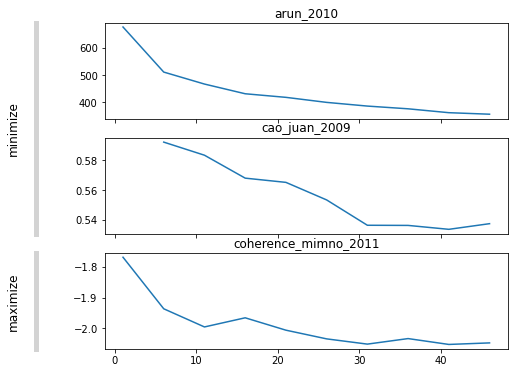

In [ ]:
plot_eval_results(results_by_n_topics) 

# Evaluation 6: reviews with 2 or less stars


In [ ]:
const_params2 = {'n_iter':500, 'eta':2, 'random_state':20191122}
ks = list(range(1, 50, 5))
print(ks)
varying_params2 = [dict(n_topics=k, alpha=1/(7*k)) for k in ks] #default 10
print(varying_params2)

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46]
[{'n_topics': 1, 'alpha': 0.14285714285714285}, {'n_topics': 6, 'alpha': 0.023809523809523808}, {'n_topics': 11, 'alpha': 0.012987012987012988}, {'n_topics': 16, 'alpha': 0.008928571428571428}, {'n_topics': 21, 'alpha': 0.006802721088435374}, {'n_topics': 26, 'alpha': 0.005494505494505495}, {'n_topics': 31, 'alpha': 0.004608294930875576}, {'n_topics': 36, 'alpha': 0.003968253968253968}, {'n_topics': 41, 'alpha': 0.003484320557491289}, {'n_topics': 46, 'alpha': 0.003105590062111801}]


In [ ]:
from tmtoolkit.topicmod import tm_lda
eval2_results = tm_lda.evaluate_topic_models(dtm2_sm, varying_params2, const_params2)

In [ ]:
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results

results_by_n_topics2 = results_by_parameter(eval2_results, 'n_topics')
print(results_by_n_topics2)

[(1, {'cao_juan_2009': nan, 'arun_2010': 220.95583482223822, 'coherence_mimno_2011': -1.9648647085080808}), (6, {'cao_juan_2009': 0.5704361996490626, 'arun_2010': 156.93459546214513, 'coherence_mimno_2011': -2.1895430945819245}), (11, {'cao_juan_2009': 0.5504964664108358, 'arun_2010': 141.6167953636759, 'coherence_mimno_2011': -2.1785906706421923}), (16, {'cao_juan_2009': 0.5369062726928291, 'arun_2010': 130.0827480296542, 'coherence_mimno_2011': -2.25038140044819}), (21, {'cao_juan_2009': 0.5726344879571064, 'arun_2010': 122.36758623325584, 'coherence_mimno_2011': -2.3537538462808896}), (26, {'cao_juan_2009': 0.5727264205833363, 'arun_2010': 130.4337511009787, 'coherence_mimno_2011': -2.5157375920945597}), (31, {'cao_juan_2009': 0.5781696231366852, 'arun_2010': 118.56428848810026, 'coherence_mimno_2011': -2.6341991100894786}), (36, {'cao_juan_2009': 0.6029916108677358, 'arun_2010': 125.6326803192355, 'coherence_mimno_2011': -2.8100061834439036}), (41, {'cao_juan_2009': 0.6196634430423

(<Figure size 576x432 with 3 Axes>,
 array([<AxesSubplot:title={'center':'arun_2010'}>,
        <AxesSubplot:title={'center':'cao_juan_2009'}>,
        <AxesSubplot:title={'center':'coherence_mimno_2011'}>],
       dtype=object))

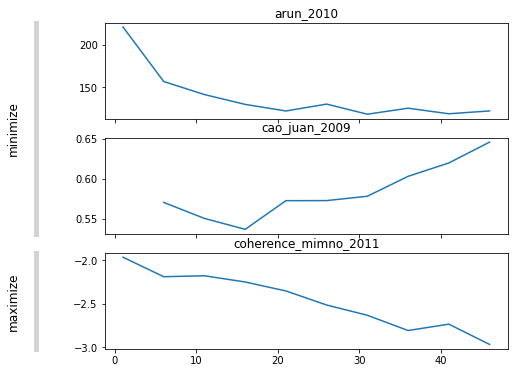

In [ ]:
plot_eval_results(results_by_n_topics2) 
#2, 1/(7*k)

# Evaluation 7: reviews with 4 or more stars

In [ ]:
const_params3 = {'n_iter':500, 'eta':1.3, 'random_state':20191122}
ks = list(range(1, 50, 5))
print(ks)
varying_params3 = [dict(n_topics=k, alpha=1/(5*k)) for k in ks] #default 10
print(varying_params3)

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46]
[{'n_topics': 1, 'alpha': 0.2}, {'n_topics': 6, 'alpha': 0.03333333333333333}, {'n_topics': 11, 'alpha': 0.01818181818181818}, {'n_topics': 16, 'alpha': 0.0125}, {'n_topics': 21, 'alpha': 0.009523809523809525}, {'n_topics': 26, 'alpha': 0.007692307692307693}, {'n_topics': 31, 'alpha': 0.0064516129032258064}, {'n_topics': 36, 'alpha': 0.005555555555555556}, {'n_topics': 41, 'alpha': 0.004878048780487805}, {'n_topics': 46, 'alpha': 0.004347826086956522}]


In [ ]:
from tmtoolkit.topicmod import tm_lda
eval3_results = tm_lda.evaluate_topic_models(dtm3_sm, varying_params3, const_params3)

In [ ]:
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results

results_by_n_topics3 = results_by_parameter(eval3_results, 'n_topics')
print(results_by_n_topics3)

[(1, {'cao_juan_2009': nan, 'arun_2010': 566.3787141884471, 'coherence_mimno_2011': -1.8038738692545881}), (6, {'cao_juan_2009': 0.6364794855443615, 'arun_2010': 434.23150454681473, 'coherence_mimno_2011': -1.916340978719884}), (11, {'cao_juan_2009': 0.6002456252407133, 'arun_2010': 388.09168462468165, 'coherence_mimno_2011': -2.0054997452915946}), (16, {'cao_juan_2009': 0.5996798111076096, 'arun_2010': 367.82290851441127, 'coherence_mimno_2011': -2.0314491541241657}), (21, {'cao_juan_2009': 0.568262171011635, 'arun_2010': 336.76536473536714, 'coherence_mimno_2011': -2.0288972297463848}), (26, {'cao_juan_2009': 0.5656637303364486, 'arun_2010': 327.36400076766984, 'coherence_mimno_2011': -2.08678721443758}), (31, {'cao_juan_2009': 0.5673382611933543, 'arun_2010': 318.6634070317752, 'coherence_mimno_2011': -2.0763636833087227}), (36, {'cao_juan_2009': 0.5676507871671891, 'arun_2010': 309.7969771050871, 'coherence_mimno_2011': -2.085511150567967}), (41, {'cao_juan_2009': 0.561376918047386

(<Figure size 576x432 with 3 Axes>,
 array([<AxesSubplot:title={'center':'arun_2010'}>,
        <AxesSubplot:title={'center':'cao_juan_2009'}>,
        <AxesSubplot:title={'center':'coherence_mimno_2011'}>],
       dtype=object))

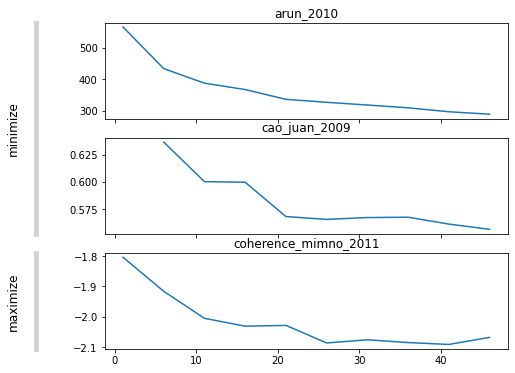

In [ ]:
plot_eval_results(results_by_n_topics3) 
#1.3, 1/(5*k)